In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import os
import random


# SHAPEFILES

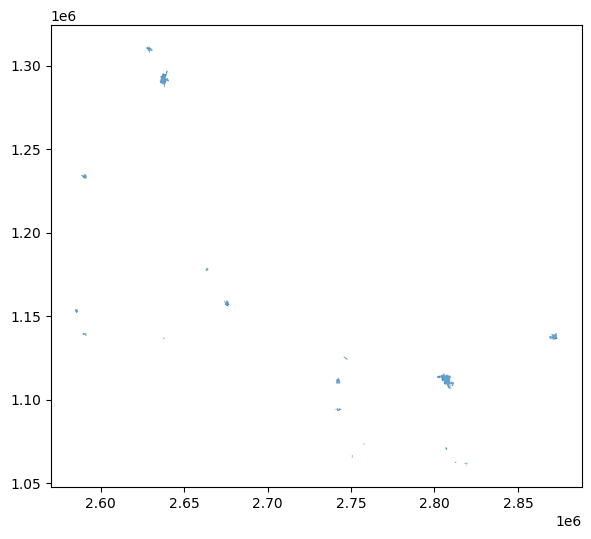

In [12]:
# data downloaded from : https://en.www.inegi.org.mx/app/mapas/
numbers = {'24001': 'ahualulcodelsonido', '24002': 'alaquines', '24003': 'aquismon', '24004': 'armadilladelosinfante', '24005': 'cardenas', '24007': 'cedral', '24008': 'cerritos', '24013': 'ciudadvalles','24015' : 'charcas', '24014': 'coxcatlan', '24016': 'ebano', '24017':'guadalcazar', '24018':'huehuetlan', '24019': 'lagunillas', '24020': 'matehuala', '24021':'mexquiticdelcarmona', '24023' : 'rayon', '24031':'santacatarina'}
fig, ax = plt.subplots(1, 1,figsize=(8,6)) # Adjust figsize as needed

slp = gpd.read_file('../SLP/shapefiles/SHAPEFILE-slpmunicipio/slp.shp')

#slp.plot(ax=ax, zorder=0, alpha=0.9)
    
# Read and plot each shapefile
for i, (num, name) in enumerate(numbers.items()):
    directory_path = f'../SLP/shapefiles/SHAPEFILE-{name}/{num}0001/conjunto_de_datos'
    #directory_path = f"{num}_vla_ne_mg_2022/{num}0001/conjunto_de_datos"
    shapefile = f"{num}0001a.shp"
    shapefile_path = os.path.join(directory_path, shapefile)
    slp = gpd.read_file(shapefile_path)
    slp.plot(ax=ax, zorder=i+1, alpha=0.9)



plt.show()

# POPULATION

In [3]:
# TODO
pop = pd.read_excel('../../Datos Nacionales/pop/INEGI_exporta_pop.xls', skiprows=5, index_col='CODE')
# pop.head()
mun = pop[pop.index.str.len() > 2]
print(mun.head())

          Municipality    Total  Hombres  Mujeres
CODE                                             
01 001  Aguascalientes  945,505  460,080  485,425
01 002        Asientos   51,474   25,231   26,243
01 003        Calvillo   58,155   28,518   29,637
01 004           Cosío   16,997    8,291    8,706
01 010        El Llano   20,383    9,976   10,407


# MORTALITY

## SLP mortality

In [14]:
mortality = pd.read_excel('../SLP/MortalidadCAMA.xlsx', sheet_name='BD')
mortality.head()

,CVEGEO,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,SEXO,CAUSA_D,defunciones,pob10,tasaEspec,eb_bayesR,E_i,smr
0,24001,24,San Luis Potosí,1,Ahualulco del Sonido 13,MUJERES,C50,7,5558,125.94,153.3352,15.657842,0.447060
1,24002,24,San Luis Potosí,2,Alaquines,MUJERES,C50,3,2410,124.48,176.3339,6.789384,0.441866
2,24003,24,San Luis Potosí,3,Aquismón,MUJERES,C50,10,11600,86.21,104.3394,32.679195,0.306005
3,24004,24,San Luis Potosí,4,Armadillo de los Infante,MUJERES,C50,3,1400,214.29,245.2087,3.944041,0.760641
4,24005,24,San Luis Potosí,5,Cárdenas,MUJERES,C50,16,6172,259.24,262.8585,17.387585,0.920197


In [2]:
mortality.plot.scatter(x='defunciones', y='E_i', alpha=0.5)
print(mortality.iloc[mortality['tasaEspec'].idxmax()])
plt.title('Deaths vs excess deaths')
plt.show()


mortality_wo_slp = mortality[mortality['NOM_MUN'] != 'San Luis Potosí']
mortality_wo_slp.plot.scatter(x='defunciones', y='E_i', alpha=0.5)
plt.title('Deaths vs excess deaths (no SLP capital)')
plt.show()

NameError: name 'mortality' is not defined

In [26]:
np.set_printoptions(precision=4)
np.corrcoef(mortality[['defunciones', 'pob10', 'tasaEspec','eb_bayesR','E_i', 'smr']].values.T)

array([[1.    , 0.9745, 0.555 , 0.5926, 0.9745, 0.555 ],
       [0.9745, 1.    , 0.5262, 0.5431, 1.    , 0.5262],
       [0.555 , 0.5262, 1.    , 0.9825, 0.5262, 1.    ],
       [0.5926, 0.5431, 0.9825, 1.    , 0.5431, 0.9825],
       [0.9745, 1.    , 0.5262, 0.5431, 1.    , 0.5262],
       [0.555 , 0.5262, 1.    , 0.9825, 0.5262, 1.    ]])

Some notes on correlation:
* deaths strongly correlated with population (not surprising) and E_i (excess deaths-- also not surprising)
* tasaEspec (age- and sex-adjusted rates) strongly correlated with eb_bayesR (bayesian smoothed rate estimate) -- also not surprising

## National Mortality

In [95]:
# data source: https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=mortalidad_Mortalidad_05_6a897e74-26b8-44de-8994-d9c46acdb64c
nat_mort = pd.read_excel('../../Datos Nacionales/MORTALIDAD/Mortalidad_05.xlsx', skiprows=6, index_col="Entidad federativa")
# print(nat_mort.groupby('Entidad federativa')['2024'].describe())
nat_mort_state_totals = nat_mort[nat_mort['Grupo quinquenal de edad'] == 'Total'].drop('Total')
print(nat_mort_state_totals.head())


                     Grupo quinquenal de edad   2010   2011   2012   2013  \
Entidad federativa                                                          
Aguascalientes                          Total   46.0   59.0   69.0   55.0   
Baja California                         Total  163.0  166.0  180.0  178.0   
Baja California Sur                     Total   31.0   39.0   36.0   34.0   
Campeche                                Total   26.0   22.0   21.0   25.0   
Coahuila de Zaragoza                    Total  158.0  178.0  187.0  195.0   

                       2014   2015   2016   2017   2018   2019   2020   2021  \
Entidad federativa                                                             
Aguascalientes         67.0   71.0   71.0   89.0   99.0   77.0   87.0   76.0   
Baja California       189.0  215.0  192.0  202.0  272.0  268.0  260.0  277.0   
Baja California Sur    31.0   33.0   34.0   55.0   66.0   49.0   57.0   57.0   
Campeche               17.0   29.0   35.0   24.0   37.0   43

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind=range(2010, 2025), ax=[46.0, 59.0, 69.0, 55.0, 67.0, 71.0, 71.0, 89.0, 99.0, 77.0, 87.0, 76.0, 74.0, 86.0, 101.0])` instead of `Series.plot(range(2010, 2025), [46.0, 59.0, 69.0, 55.0, 67.0, 71.0, 71.0, 89.0, 99.0, 77.0, 87.0, 76.0, 74.0, 86.0, 101.0])`.

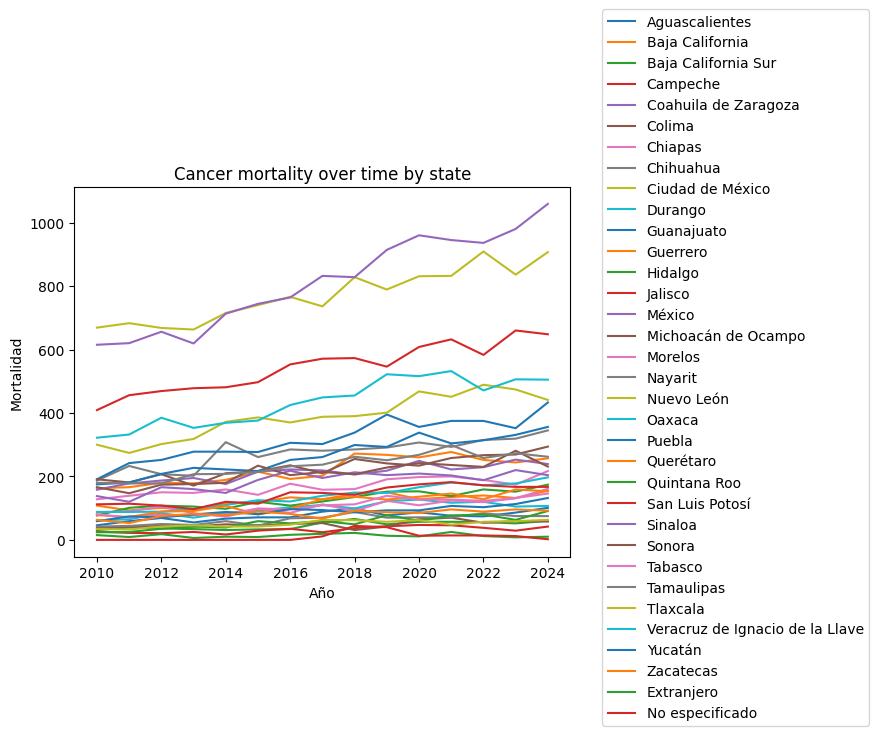

In [105]:
for i, state in nat_mort_state_totals.iterrows():
    # print(state)
    years = range(2010, 2025)
    plt.plot(years, [state[str(y)] for y in years], label=i)

plt.title('Cancer mortality over time by state')
plt.legend(loc='upper left', bbox_to_anchor = (1.05, 1.5))
plt.xlabel('Año')
plt.ylabel('Mortalidad')
plt.show()

In [107]:
nat_mort_state_totals['2010'].idxmax()

'Ciudad de México'

# WATER

In [2]:
# water = pd.read_excel("../SLP/AmbientalAGUA.xlsx")
water = pd.read_excel("../../Datos Nacionales/AGUA/Calidad del Agua Subterranea 2020.xlsx")
# print(water.head())
# print(f'{len(water)} total rows')
print(len(water[water['ESTADO'] == 'SAN LUIS POTOSI']))

47


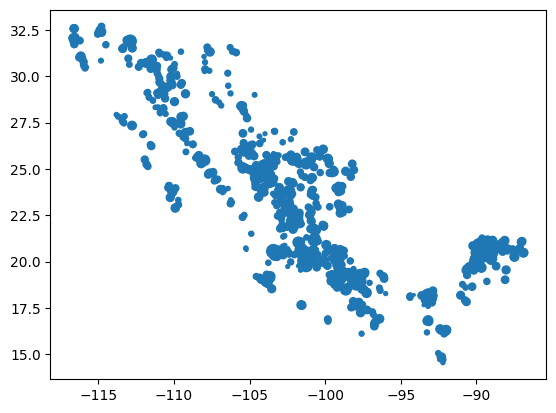

{(-102.0221, 22.20887): 229.99, (-102.20075, 21.99958): 231.99, (-102.28801, 22.36685): 204.92, (-102.29449, 22.18435): 327.0, (-110.2448, 23.45138): 309.885, (-110.22067, 23.46493): 224.475, (-110.21396, 23.4746): 203.67, (-109.907306, 22.8905): 350.76, (-110.088778, 23.799861): 343.655, (-110.054722, 23.824722): 332.605, (-109.907091, 23.94632): 136.53, (-110.108253, 23.807347): 247.52, (-109.95892, 23.97374): 103.23, (-110.0611, 23.80554): 240.89, (-110.11185, 23.74221): 380.12, (-111.72009, 25.13549): 204.765, (-111.8038, 25.2401): 244.185, (-111.92221, 25.5047): 251.97, (-109.9646667, 23.96966): 130.98, (-111.4857, 26.2279): 249.66, (-111.50755, 26.24466): 221.19, (-111.54894, 26.30176): 205.86, (-112.00146, 26.88679): 189.435, (-112.05319, 26.85661): 208.05, (-112.762754, 27.3359): 378.0, (-113.7937, 27.9193): 103.13, (-113.67867, 27.82175): 140.0, (-113.4545, 27.7335): 150.0, (-113.44772, 27.62943): 135.0, (-113.3826, 27.5469): 187.0, (-113.34142, 27.5281): 161.0, (-113.2982, 27

In [4]:
x = water['LONGITUD']
y = water['LATITUD']
z = water['ALC_mg/L']
plt.scatter(x,y, s=(z/10))
plt.show()
S = {(xi, yi): zi for xi, yi, zi in zip(x,y,z)}
print(S)

In [35]:
print(water.groupby(['ESTADO'])[['ALC_mg/L']].describe())
print((water['ALC_mg/L']))
water.at[863, 'ACL_mg/L'] = 0


                                ALC_mg/L                                   \
                                   count        mean         std      min   
ESTADO                                                                      
AGUASCALIENTES                      14.0  228.653571   81.110447  116.630   
BAJA CALIFORNIA                     31.0  204.997742   65.499123   65.790   
BAJA CALIFORNIA SUR                 49.0  194.632449   74.088449   66.600   
CAMPECHE                            25.0  261.668400   68.366161  145.160   
CHIAPAS                             21.0  212.443810  130.650882   58.260   
CHIHUAHUA                           35.0  181.045429   67.847897   75.555   
COAHUILA DE ZARAGOZA                59.0  241.445508  107.313486   26.640   
COLIMA                              26.0  220.491346   82.640848   69.930   
DISTRITO FEDERAL                     2.0  204.425000    9.376236  197.795   
DURANGO                            121.0  233.075455   92.652474   62.985   

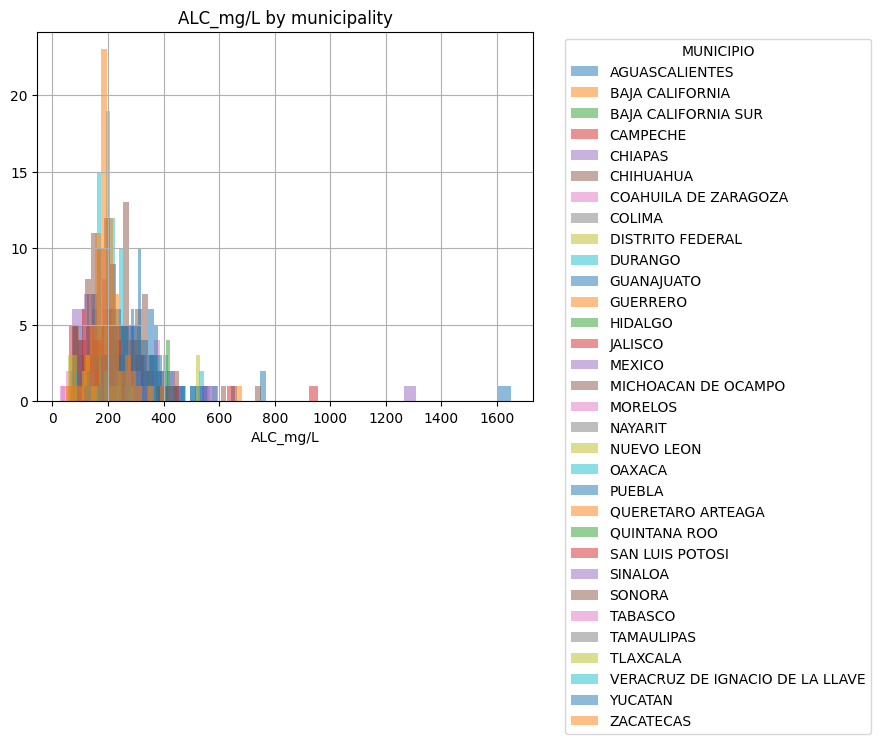

In [40]:

chem = 'ALC_mg/L' # 'N_NO3_mg/L'
for municipio, group_data in water.groupby('ESTADO'):

    # print(group_data[chem].describe())
    group_data[chem].hist(bins=30, alpha=0.5, label=municipio)#, color=(random.random(), random.random(), random.random()))
    # plt.title(f'{chem} for {municipio}')
    # plt.xlabel(chem)
    # plt.xlim((water[chem].min(), water[chem].max()))
    # plt.show()

plt.legend(title='MUNICIPIO', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title(f'{chem} by municipality')
plt.xlabel(chem)
plt.show()



In [56]:
print(water.nlargest(50, chem)[['ESTADO', chem, 'CALIDAD_ALC']])
print(water[water['CALIDAD_ALC'] == 'Indeseable como FAAP'].groupby('ESTADO')['ALC_mg/L'].agg(['mean', 'median', 'count']))
# print(len(water[water['CALIDAD_ALC'] == 'Indeseable como FAAP']))


                            mean   median  count
ESTADO                                          
AGUASCALIENTES        403.300000  403.300      1
CAMPECHE              448.850000  448.850      1
CHIAPAS               436.750000  437.390      3
COAHUILA DE ZARAGOZA  487.910000  441.780      3
COLIMA                446.900000  446.900      1
DURANGO               467.195625  457.710      8
GUANAJUATO            539.597000  481.655     10
HIDALGO               412.726667  413.515      6
JALISCO               800.310000  800.310      2
MEXICO                920.445000  920.445      2
MICHOACAN DE OCAMPO   626.000000  626.000      1
NUEVO LEON            410.625000  410.625      1
PUEBLA                790.000000  547.000      4
QUERETARO ARTEAGA     402.000000  402.000      1
SAN LUIS POTOSI       455.520000  455.520      1
SINALOA               507.270000  507.270      2
SONORA                515.517500  447.080      4
TABASCO               572.760000  572.760      1
TLAXCALA            

                   BAD_ALC_FREQ
GUANAJUATO             0.243902
PUEBLA                 0.173913
QUERETARO ARTEAGA      0.166667
HIDALGO                0.162162
CHIAPAS                0.142857
TLAXCALA               0.125000
MEXICO                 0.083333
TABASCO                0.076923
AGUASCALIENTES         0.071429
NUEVO LEON             0.066667


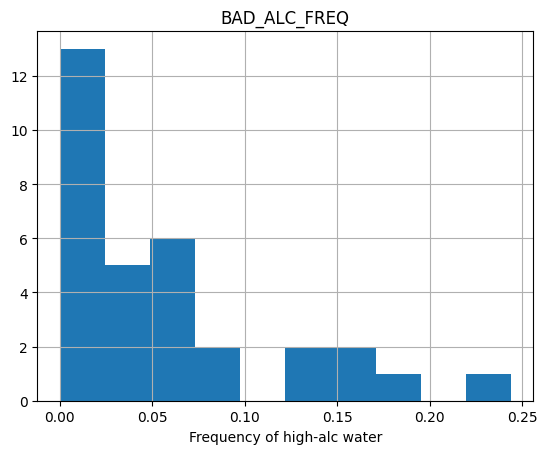

In [76]:
state_summ = pd.DataFrame(index = water['ESTADO'].unique())


bad_freqs = {}

for municipio, group_data in water.groupby('ESTADO'):
    bad_alc_freq = len(group_data[group_data['CALIDAD_ALC'] == 'Indeseable como FAAP']) / len(group_data)
    bad_freqs[municipio] = (bad_alc_freq)
    # print(f'{bad_alc_freq:.2f} of {municipio} measurements rated as bad')

state_summ['BAD_ALC_FREQ'] = bad_freqs
print(state_summ.nlargest(10, 'BAD_ALC_FREQ'))
state_summ.hist('BAD_ALC_FREQ')
plt.xlabel('Frequency of high-alc water')
plt.show()

# Distance- scaled